In [63]:
import numpy as np
from sympy import Symbol
import matplotlib.pyplot as plt
from misc_tools.print_latex import print_tex

Function to fit

Source https://alexshtf.github.io/2024/01/21/Bernstein.html

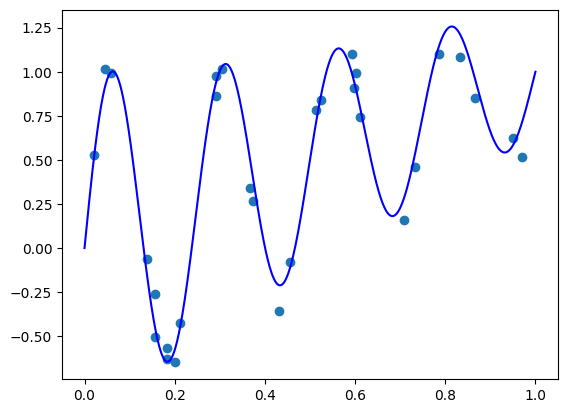

In [64]:
def true_func(x):
  return np.sin(8 * np.pi * x) / np.exp(x) + x

m = 30
sigma = 0.1

# generate features
np.random.seed(42)
X = np.random.rand(m)
y = true_func(X) + sigma * np.random.randn(m)

plt_xs = np.linspace(0, 1, 1000)
plt.scatter(X.ravel(), y.ravel())
plt.plot(plt_xs, true_func(plt_xs), 'blue')
plt.show()

See [lin_reg.ipynb](Linear/lin_reg.ipynb) for regression matrix explanation.

Basically we express data fit as
$$
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_2 \\ \beta_3
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
$$
$$=V_m\vec{\beta}=\vec{y}$$

Matrix $V_m$ is called "Vandermonde matrix"

* Rows will contain powers of same sample point. 
* Columns separate sample points

Create this matrix

In [65]:
n = 50  # poly degree
Vm = np.array([[a**i for i in range(n+1)] for a in X])
Vm_np = np.polynomial.polynomial.polyvander(X, deg=n) # exicting solution
print(np.allclose(Vm,Vm_np), Vm.shape)

True (30, 51)


In [66]:
x = Symbol('x', real=True)
print_tex(np.polynomial.polynomial.polyvander(x, deg=4))

<IPython.core.display.Math object>

Plot basis function. 

Can extract as columns of $Vm$

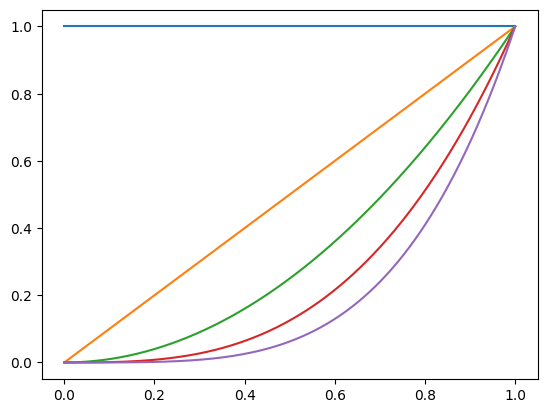

In [67]:
Vm_poly = np.polynomial.polynomial.polyvander(plt_xs, deg=4)
for i,v in enumerate(Vm_poly.T):
    plt.plot(plt_xs, v)


Find best fit using linear regression.

Solution is vector of coefficients $\vec{\beta}$

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)# constants included
model.fit(Vm, y)
print(model.coef_.shape) # coefficients

(51,)


to evaluate model on different sample points, we create new $Vm$ and 'dot' it with $\vec{\beta}$

$$=V_m^{\text{new}}\vec{\beta}=\vec{y}^{\text{new}}$$

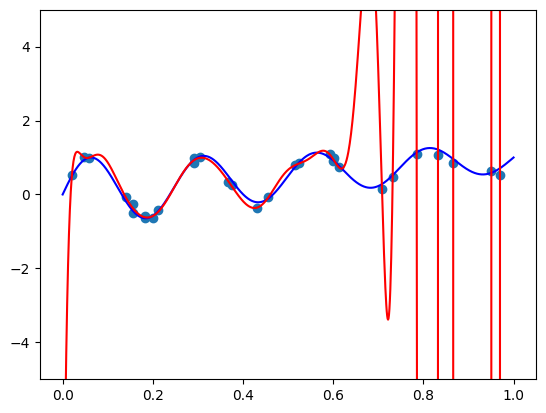

In [69]:
plt.scatter(X.ravel(), y.ravel())                                    # plot the samples
plt.plot(plt_xs, true_func(plt_xs), 'blue')                          # plot the true function
Vm_new = np.array([[a**i for i in range(n+1)] for a in plt_xs])
plt.plot(plt_xs, model.predict(Vm_new), 'r') # plot the fit model
plt.ylim([-5, 5])
plt.show()

Try Ridge regression (L2 norm on weights, in simplest case)
https://en.wikipedia.org/wiki/Ridge_regression

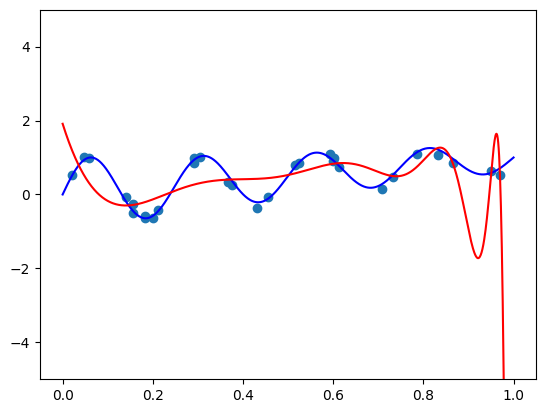

In [70]:
from sklearn.linear_model import Ridge

reg_coef = 1e-7

def fit_and_plot(vander, n, alpha):
  model = Ridge(fit_intercept=False, alpha=alpha)
  model.fit(vander(X, deg=n), y)

  plt.scatter(X.ravel(), y.ravel())                           # plot the samples
  plt.plot(plt_xs, true_func(plt_xs), 'blue')                 # plot the true function
  plt.plot(plt_xs, model.predict(vander(plt_xs, deg=n)), 'r') # plot the fit model
  plt.ylim([-5, 5])
  plt.show()  

fit_and_plot(np.polynomial.polynomial.polyvander,n,reg_coef)

### Chebyshev basis

<IPython.core.display.Math object>

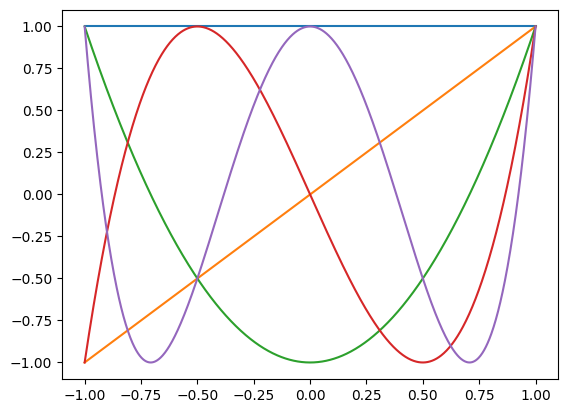

In [71]:
print_tex(np.polynomial.chebyshev.chebvander(x, deg=4))
rescale = lambda x: 2*x - 1 # domain [0,1] to [-1,1]
def chebvander_rescaled(x, deg=4):
    return np.polynomial.chebyshev.chebvander(rescale(x), deg=deg)

Vm_cheb = chebvander_rescaled(plt_xs, deg=4)
for i,v in enumerate(Vm_cheb.T):
    plt.plot(rescale(plt_xs), v)


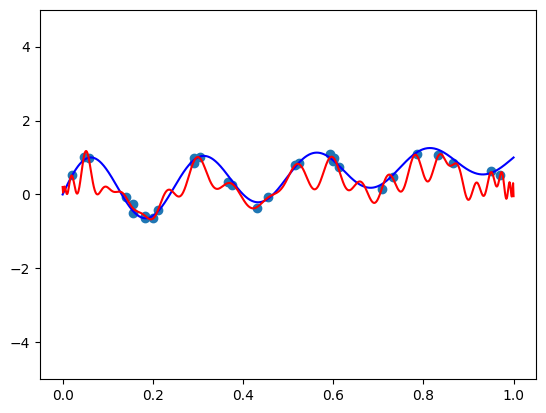

In [72]:
fit_and_plot(chebvander_rescaled,n,1)

### Legendre polynomials

In [73]:
[display(basis) for basis in np.polynomial.legendre.legvander(x, deg=4)[0]];

1

x

3*x**2/2 - 1/2

5*x*(3*x**2/2 - 1/2)/3 - 2*x/3

-9*x**2/8 + 7*x*(5*x*(3*x**2/2 - 1/2)/3 - 2*x/3)/4 + 3/8

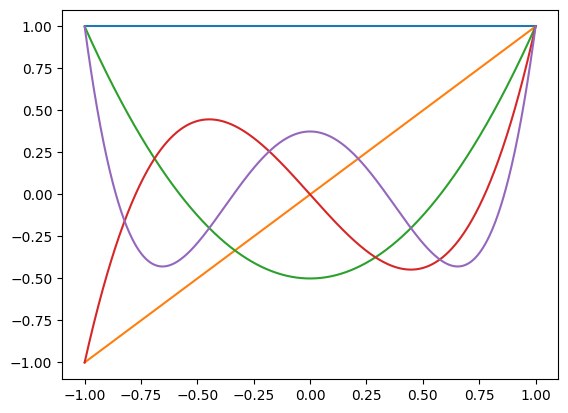

In [74]:
def legvander_rescaled(x, deg=4):
    return np.polynomial.legendre.legvander(rescale(x), deg=deg)

for i,v in enumerate(legvander_rescaled(plt_xs).T):
    plt.plot(rescale(plt_xs), v)

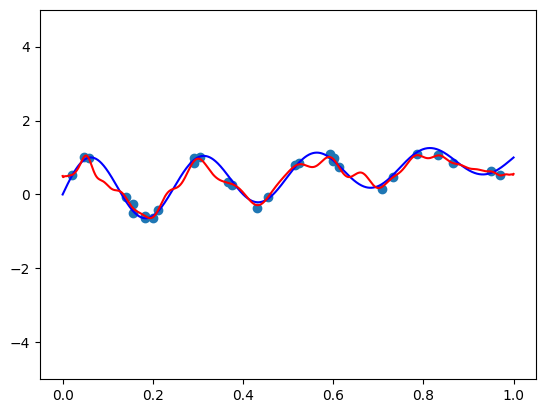

In [83]:
fit_and_plot(legvander_rescaled,n,0.1);

### Bernstein polynomials

see [Bezier_curves/notes_Hovey.ipynb](../Bezier_curves/notes_Hovey.ipynb)

$$B_i^p(t) = {p\choose i} t^i(1-t)^{p-i}$$

c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


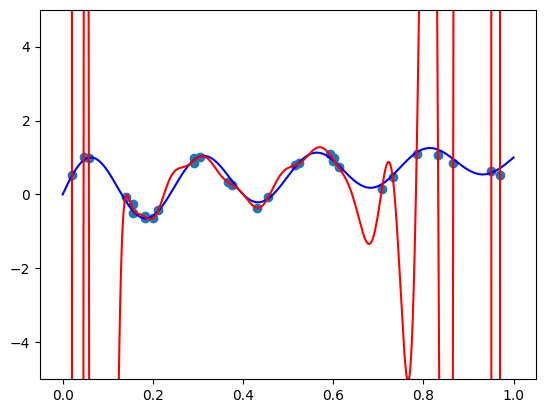

In [85]:
from scipy.stats import binom

def bernvander(x, deg):
	return binom.pmf(np.arange(1 + deg), deg, x.reshape(-1, 1))

fit_and_plot(bernvander, n=50, alpha=0)

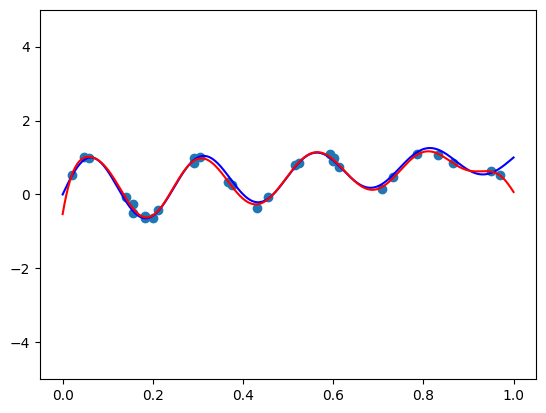

In [88]:
fit_and_plot(bernvander, n=50, alpha=0.001)